In [76]:
import pandas as pd
from transformers import BertModel, BertTokenizer
import torch

In [77]:
pd.set_option('display.max_columns', None)
df_embedded = pd.read_csv('embedded_emp_title_27732rows.csv')
df_embedded.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,issue_d,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,loan_status_Charged Off,loan_status_Fully Paid,emp_title_embedded
0,10000.0,36 months,11.44,329.48,1,8,Marketing,1,117000.0,Jan-2015,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,[-1.19673356e-01 2.33961135e-01 -2.12807775e-...


In [93]:
for i, row in df_embedded.iterrows():
    df_embedded.at[i, 'emp_title_embedded'] = row['emp_title_embedded'].replace('\n', ' ').replace('[', '').replace(']', '').strip().split()

In [101]:
for i in range(len(df_embedded)):
    assert len(df_embedded['emp_title_embedded'].iloc[i]) == 768, i

In [108]:
df_embedded.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,issue_d,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,loan_status_Charged Off,loan_status_Fully Paid,emp_title_embedded
0,10000.0,36 months,11.44,329.48,1,8,Marketing,1,117000.0,Jan-2015,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,"[-1.19673356e-01, 2.33961135e-01, -2.12807775e..."


In [111]:
# Load pre-trained BERT model and tokenizer
model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).




In [114]:
df_embedded['title'] = df_embedded['title'].fillna(value='Not available')

In [115]:
# Encode the sentence
sentences = list(df_embedded['title'])

input_idss = []
for sentence in sentences:
    input_idss.append(tokenizer.encode(sentence, add_special_tokens=True, return_tensors='pt'))

embedded_sentences = []

# Get the BERT embedding
with torch.no_grad():
    for input_ids in input_idss:
        outputs = model(input_ids)
        embedded_sentences.append(outputs[0][:, 0, :].numpy())

In [127]:
sentences_encoded = []

for i in range(len(embedded_sentences)):
    sentences_encoded.append(embedded_sentences[i][0])

In [130]:
df_copy = df_embedded.copy()
df_copy['title_embedded'] = sentences_encoded
df_copy['title_embedded'].head()

0    [-0.15220639, 0.066975616, 0.09477971, -0.0405...
1    [-0.49112585, 0.12180773, -0.3471778, -0.07240...
2    [-0.15872274, -0.19171149, -0.38434136, -0.130...
3    [-0.15872274, -0.19171149, -0.38434136, -0.130...
4    [-0.12488415, -0.13420859, -0.4793807, -0.0494...
Name: title_embedded, dtype: object

In [131]:
df_copy.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,issue_d,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,loan_status_Charged Off,loan_status_Fully Paid,emp_title_embedded,title_embedded
0,10000.0,36 months,11.44,329.48,1,8,Marketing,1,117000.0,Jan-2015,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,"[-1.19673356e-01, 2.33961135e-01, -2.12807775e...","[-0.15220639, 0.066975616, 0.09477971, -0.0405..."
1,8000.0,36 months,11.99,265.68,1,9,Credit analyst,7,65000.0,Jan-2015,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,"[-7.92441845e-01, -1.11418786e-02, -3.84553969...","[-0.49112585, 0.12180773, -0.3471778, -0.07240..."
2,15600.0,36 months,10.49,506.97,1,7,Statistician,11,43057.0,Jan-2015,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,"[-6.28932297e-01, 1.22651808e-01, 3.20009701e-...","[-0.15872274, -0.19171149, -0.38434136, -0.130..."
3,7200.0,36 months,6.49,220.65,0,1,Client Advocate,5,54000.0,Nov-2014,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,"[-3.50354105e-01, 2.21070826e-01, 1.04529038e-...","[-0.15872274, -0.19171149, -0.38434136, -0.130..."
4,24375.0,60 months,17.27,609.33,2,14,Destiny Management Inc.,2,55000.0,Apr-2013,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,"[-3.90784353e-01, -3.34680974e-01, -7.11725593...","[-0.12488415, -0.13420859, -0.4793807, -0.0494..."


<AxesSubplot:>

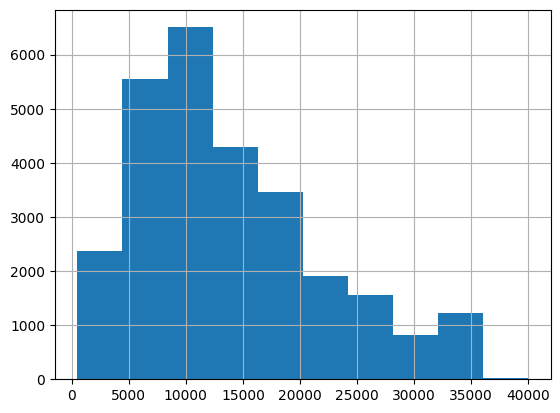

In [137]:
df_copy['loan_amnt'].hist()

In [138]:
print(df_copy['loan_amnt'].min())
print(df_copy['loan_amnt'].max())

500.0
40000.0


In [191]:
ll = list(df_copy['loan_amnt'].unique())
ll = [int(x) for x in ll]
ll.sort()
print(ll)
print(len(ll))

[500, 700, 800, 900, 1000, 1125, 1200, 1225, 1250, 1275, 1300, 1325, 1350, 1375, 1400, 1450, 1475, 1500, 1550, 1575, 1600, 1625, 1650, 1675, 1700, 1750, 1775, 1800, 1850, 1875, 1900, 1925, 1950, 1975, 2000, 2050, 2075, 2100, 2150, 2175, 2200, 2225, 2250, 2275, 2300, 2375, 2400, 2450, 2500, 2525, 2550, 2600, 2625, 2650, 2675, 2700, 2725, 2750, 2775, 2800, 2825, 2850, 2875, 2900, 2925, 2950, 2975, 3000, 3025, 3050, 3075, 3100, 3125, 3150, 3175, 3200, 3225, 3250, 3300, 3325, 3350, 3375, 3400, 3425, 3450, 3475, 3500, 3525, 3550, 3575, 3600, 3625, 3650, 3675, 3700, 3725, 3750, 3775, 3800, 3825, 3850, 3875, 3900, 3925, 3950, 3975, 4000, 4025, 4050, 4075, 4100, 4125, 4150, 4175, 4200, 4225, 4250, 4275, 4300, 4325, 4350, 4375, 4400, 4425, 4450, 4475, 4500, 4525, 4550, 4575, 4600, 4625, 4650, 4675, 4700, 4725, 4750, 4775, 4800, 4825, 4850, 4875, 4900, 4950, 4975, 5000, 5025, 5050, 5075, 5100, 5125, 5150, 5175, 5200, 5225, 5250, 5275, 5300, 5325, 5350, 5375, 5400, 5425, 5450, 5475, 5500, 5525, 5

In [197]:
df_copy2 = df_copy.copy()
init_bin = 0
# bins = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]
bins = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500, 20000, 20500, 21000, 21500, 22000, 22500, 23000, 23500, 24000, 24500, 25000, 25500, 26000, 26500, 27000, 27500, 28000, 28500, 29000, 29500, 30000, 30500, 31000, 31500, 32000, 32500, 33000, 33500, 34000, 34500, 35000, 35500, 36000, 36500, 37000, 37500, 38000, 38500, 39000, 39500, 40000]
for bin_ in bins:
    df_copy2.loc[(df_copy2['loan_amnt'] > init_bin) & (df_copy2['loan_amnt'] <= bin_), 'loan_amnt'] = bin_
    init_bin = bin_

df_copy2['loan_amnt'].head()

0    10000.0
1     8000.0
2    16000.0
3     7500.0
4    24500.0
Name: loan_amnt, dtype: float64

In [204]:
df_copy2['loan_amnt'] = pd.Categorical(list(df_copy2['loan_amnt'])).codes

In [248]:
df_copy2['revol_util'] = df_copy2['revol_util'].fillna(value=-1)
df_copy2['mort_acc'] = df_copy2['mort_acc'].fillna(value=-1)
df_copy2['pub_rec_bankruptcies'] = df_copy2['pub_rec_bankruptcies'].fillna(value=-1)

In [307]:
df_copy2 = pd.get_dummies(df_copy2, columns=['term'], dtype=int)
df_copy2.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,issue_d,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,loan_status_Charged Off,loan_status_Fully Paid,emp_title_embedded,title_embedded,term_ 36 months,term_ 60 months
0,19,11.44,329.48,1,8,Marketing,1,117000.0,Jan-2015,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,"[-1.19673356e-01, 2.33961135e-01, -2.12807775e...","[-0.15220639, 0.066975616, 0.09477971, -0.0405...",1,0
1,15,11.99,265.68,1,9,Credit analyst,7,65000.0,Jan-2015,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,"[-7.92441845e-01, -1.11418786e-02, -3.84553969...","[-0.49112585, 0.12180773, -0.3471778, -0.07240...",1,0
2,31,10.49,506.97,1,7,Statistician,11,43057.0,Jan-2015,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,"[-6.28932297e-01, 1.22651808e-01, 3.20009701e-...","[-0.15872274, -0.19171149, -0.38434136, -0.130...",1,0
3,14,6.49,220.65,0,1,Client Advocate,5,54000.0,Nov-2014,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,"[-3.50354105e-01, 2.21070826e-01, 1.04529038e-...","[-0.15872274, -0.19171149, -0.38434136, -0.130...",1,0
4,48,17.27,609.33,2,14,Destiny Management Inc.,2,55000.0,Apr-2013,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,"[-3.90784353e-01, -3.34680974e-01, -7.11725593...","[-0.12488415, -0.13420859, -0.4793807, -0.0494...",0,1


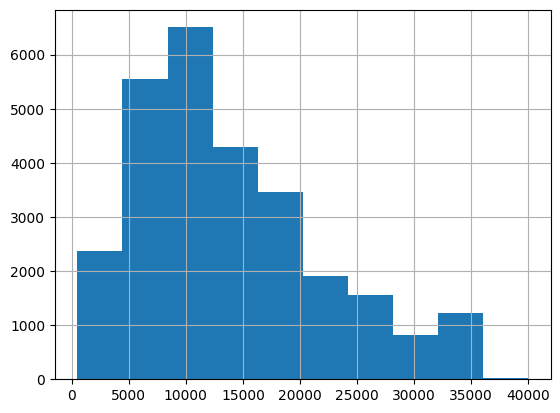

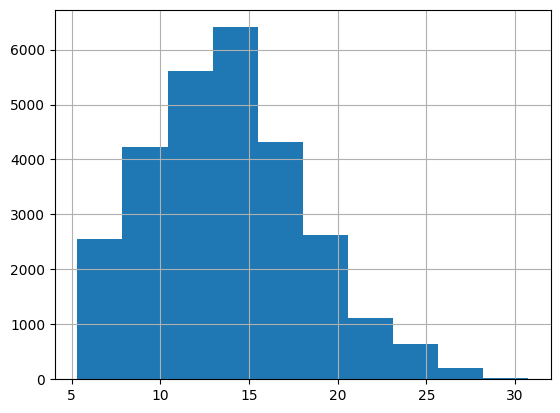

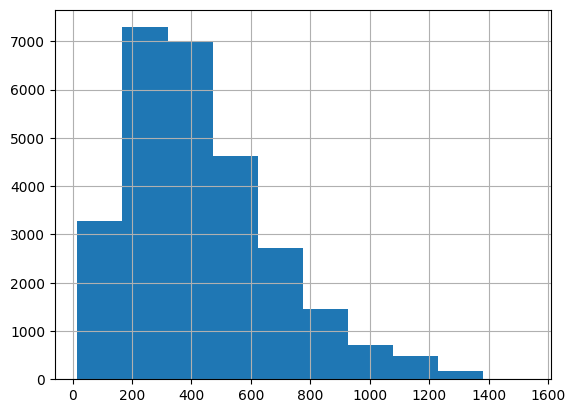

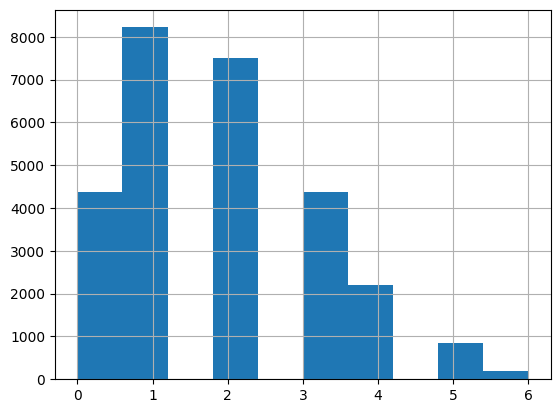

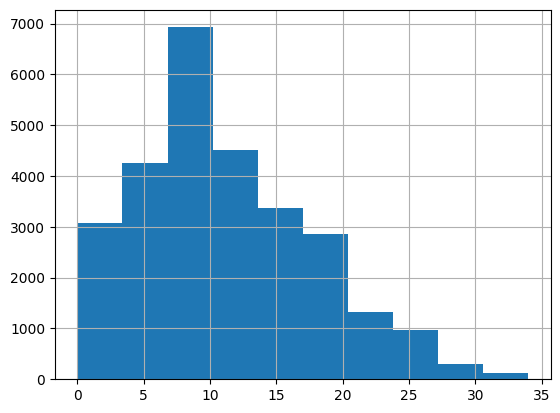

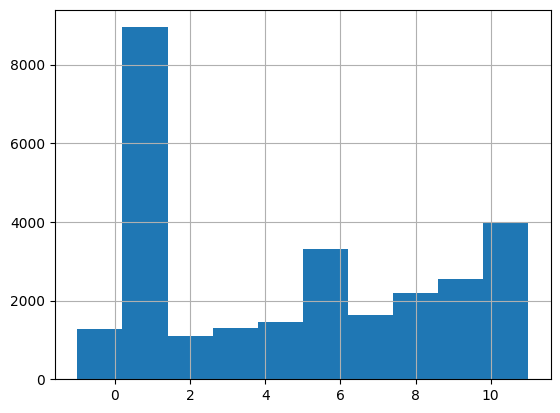

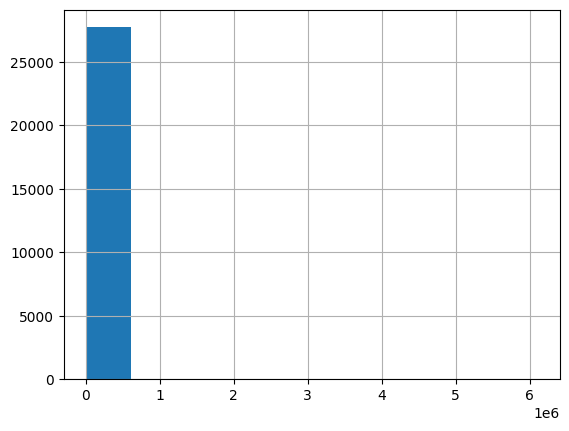

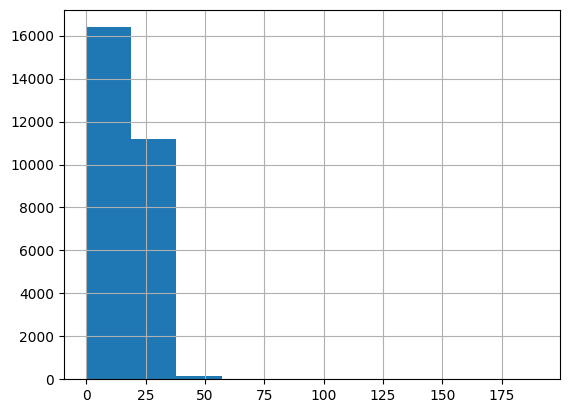

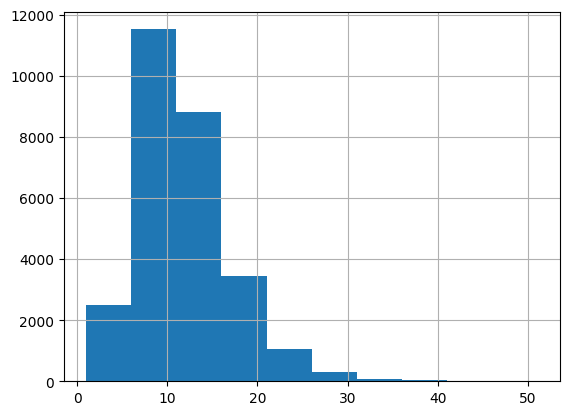

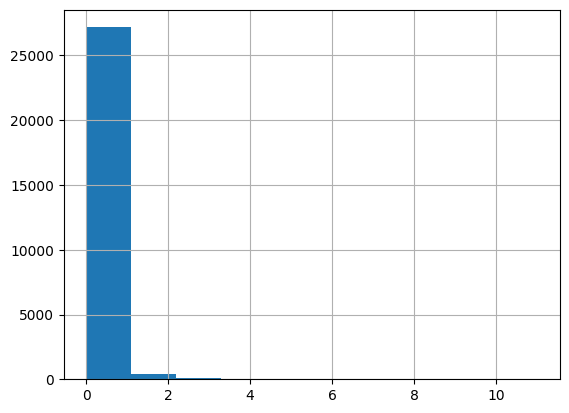

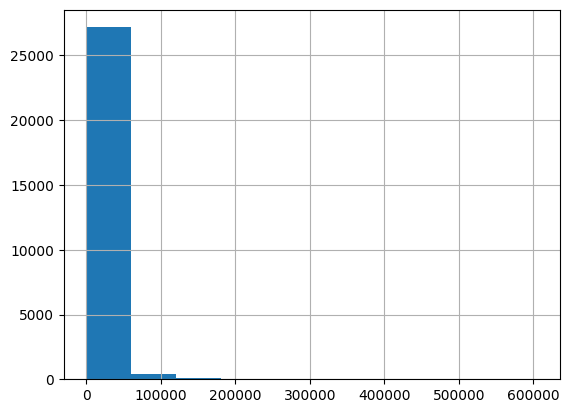

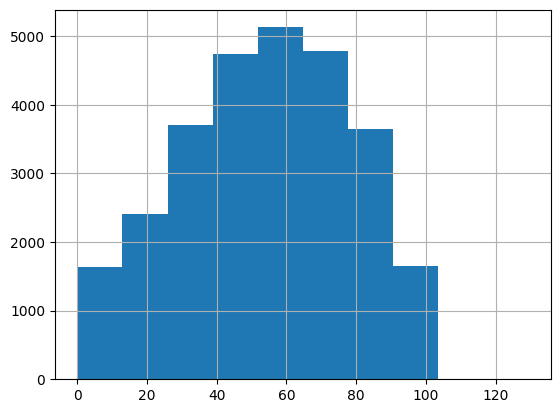

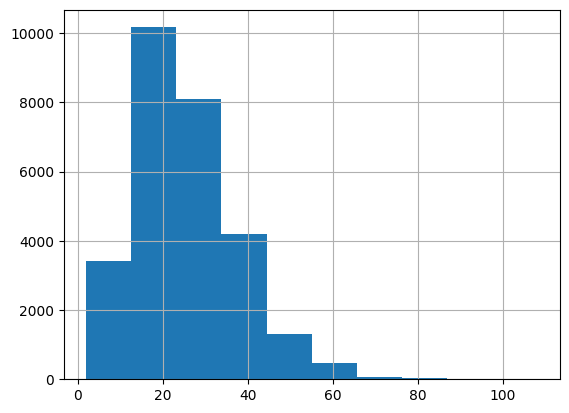

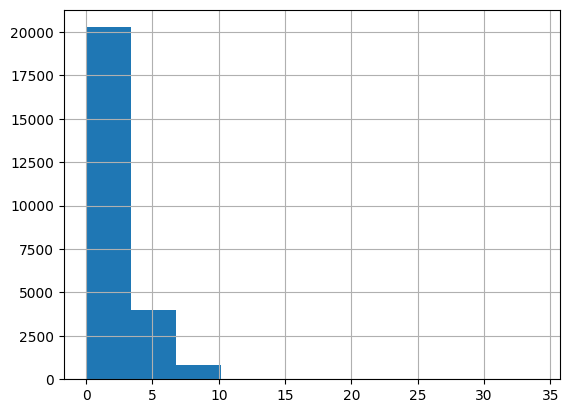

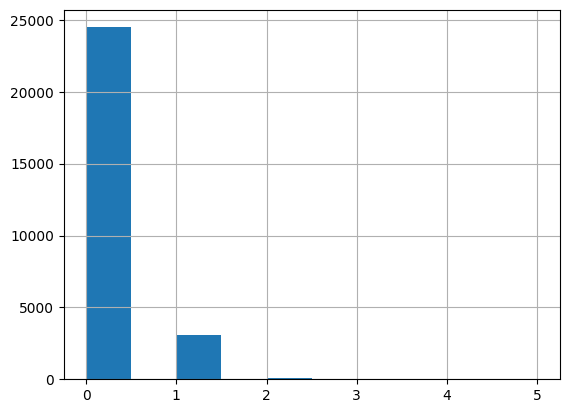

In [308]:
import matplotlib.pyplot as plt
columns = ['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc','dti', 
           'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies',]
for col in columns:
    df_copy[col].hist()
    plt.show()

In [309]:
# copy the data 
df_z_scaled = df_copy2.copy() 
  
# apply normalization techniques 
columns = ['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
for column in columns: 
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()     
  
# view normalized data    
display(df_z_scaled)

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,issue_d,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,loan_status_Charged Off,loan_status_Fully Paid,emp_title_embedded,title_embedded,term_ 36 months,term_ 60 months
0,-0.501324,-0.498190,-0.408897,-0.622725,-0.473423,Marketing,-0.993254,0.681496,Jan-2015,Vacation,1.076962,Jun-1990,0.924054,-0.351039,1.080950,-0.496984,-0.030053,-0.705896,-0.338336,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,"[-1.19673356e-01, 2.33961135e-01, -2.12807775e...","[-0.15220639, 0.066975616, 0.09477971, -0.0405...",1,0
1,-0.741870,-0.374954,-0.664686,-0.622725,-0.321459,Credit analyst,0.593359,-0.144800,Jan-2015,Debt consolidation,0.567165,Jul-2004,1.120011,-0.351039,0.227169,-0.024828,0.139638,0.667178,-0.338336,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,"[-7.92441845e-01, -1.11418786e-02, -3.84553969...","[-0.49112585, 0.12180773, -0.3471778, -0.07240...",1,0
2,0.220314,-0.711052,0.302703,-0.622725,-0.625388,Statistician,1.651101,-0.493481,Jan-2015,Credit card refinancing,-0.559498,Aug-2007,0.336184,-0.351039,-0.201036,1.572291,0.054792,-0.705896,-0.338336,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,"[-6.28932297e-01, 1.22651808e-01, 3.20009701e-...","[-0.15872274, -0.19171149, -0.38434136, -0.130...",1,0
3,-0.802007,-1.607315,-0.845222,-1.374418,-1.537174,Client Advocate,0.064488,-0.319593,Nov-2014,Credit card refinancing,-1.799314,Sep-2006,-1.035515,-0.351039,-0.543589,-1.330443,-1.048202,-0.705896,-0.338336,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,"[-3.50354105e-01, 2.21070826e-01, 1.04529038e-...","[-0.15872274, -0.19171149, -0.38434136, -0.130...",1,0
4,1.242635,0.808113,0.713089,0.128969,0.438364,Destiny Management Inc.,-0.728819,-0.303703,Apr-2013,Credit Card Refinance,2.015037,Mar-1999,0.336184,-0.351039,0.461305,0.652613,1.497170,-0.248205,-0.338336,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,"[-3.90784353e-01, -3.34680974e-01, -7.11725593...","[-0.12488415, -0.13420859, -0.4793807, -0.0494...",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27727,-0.982416,-0.070224,-0.915263,0.128969,-0.017530,Business Development Officer,0.064488,-0.383154,Oct-2014,Debt consolidation,0.203372,May-2007,-0.055730,-0.351039,-0.048714,1.108347,-0.793665,-0.248205,-0.338336,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,"[-7.44003296e-01, 1.64659038e-01, -2.58242816e...","[-0.49112585, 0.12180773, -0.3471778, -0.07240...",1,0
27728,1.302771,-0.478024,1.576799,-0.622725,-0.321459,Manager,-0.993254,0.029993,Jul-2015,Home improvement,-1.514607,Nov-1987,0.140227,1.591688,-0.612047,-1.519305,0.224484,1.582560,-0.338336,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,"[-3.33579421e-01, 3.05586249e-01, -6.42695665e...","[-0.14054061, 0.09537455, -0.3559106, -0.05762...",1,0
27729,-0.140505,1.249522,0.139086,1.632356,1.502115,Assistant Store Director,1.122230,-0.335483,Nov-2014,Debt consolidation,0.499030,Dec-2003,1.120011,-0.351039,-0.466298,0.886639,0.903250,-0.705896,-0.338336,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,"[-6.69414401

In [313]:
ddates = list(df_z_scaled['issue_d'].unique())

In [314]:
from datetime import datetime

date_str = 'Dec-2008'
date_obj = datetime.strptime(date_str, '%b-%Y')

# Now you can compare and sort the dates, for example let's create a list of dates
dates = [datetime.strptime(date, '%b-%Y') for date in ddates]

# Sort the dates
sorted_dates = sorted(dates)

# Print sorted dates
for date in sorted_dates:
    print(date.strftime('%b-%Y'))

Jun-2007
Aug-2007
Sep-2007
Oct-2007
Nov-2007
Dec-2007
Jan-2008
Feb-2008
Mar-2008
Apr-2008
May-2008
Jun-2008
Jul-2008
Aug-2008
Sep-2008
Oct-2008
Nov-2008
Dec-2008
Jan-2009
Feb-2009
Mar-2009
Apr-2009
May-2009
Jun-2009
Jul-2009
Aug-2009
Sep-2009
Oct-2009
Nov-2009
Dec-2009
Jan-2010
Feb-2010
Mar-2010
Apr-2010
May-2010
Jun-2010
Jul-2010
Aug-2010
Sep-2010
Oct-2010
Nov-2010
Dec-2010
Jan-2011
Feb-2011
Mar-2011
Apr-2011
May-2011
Jun-2011
Jul-2011
Aug-2011
Sep-2011
Oct-2011
Nov-2011
Dec-2011
Jan-2012
Feb-2012
Mar-2012
Apr-2012
May-2012
Jun-2012
Jul-2012
Aug-2012
Sep-2012
Oct-2012
Nov-2012
Dec-2012
Jan-2013
Feb-2013
Mar-2013
Apr-2013
May-2013
Jun-2013
Jul-2013
Aug-2013
Sep-2013
Oct-2013
Nov-2013
Dec-2013
Jan-2014
Feb-2014
Mar-2014
Apr-2014
May-2014
Jun-2014
Jul-2014
Aug-2014
Sep-2014
Oct-2014
Nov-2014
Dec-2014
Jan-2015
Feb-2015
Mar-2015
Apr-2015
May-2015
Jun-2015
Jul-2015
Aug-2015
Sep-2015
Oct-2015
Nov-2015
Dec-2015
Jan-2016
Feb-2016
Mar-2016
Apr-2016
May-2016
Jun-2016
Jul-2016
Aug-2016
Sep-2016
O

In [315]:
df_z_scaled.to_csv('partial_scaled.csv')

In [361]:
from datetime import datetime

def date_ordinal(sorted_dates):
    ordinal_encoding = {}

    current_ordinal = 0
    current_date = sorted_dates[0]

    for date in sorted_dates[:]:
        while current_date.strftime('%b-%Y') != date.strftime('%b-%Y'):
            current_ordinal += 1
            if current_date.month == 12:
                current_date = current_date.replace(year=(current_date.year + 1), month=(current_date.month % 12 + 1))
            else:
                current_date = current_date.replace(month=(current_date.month % 12) + 1)
        ordinal_encoding[date.strftime('%b-%Y')] = current_ordinal
        
    return ordinal_encoding

In [364]:
iss_d = date_ordinal(sorted([datetime.strptime(date, '%b-%Y') for date in list(df_z_scaled['issue_d'].unique())]))

In [365]:
ear_cr_line = date_ordinal(sorted([datetime.strptime(date, '%b-%Y') for date in list(df_z_scaled['earliest_cr_line'].unique())]))

In [370]:
df_z_scaled = df_z_scaled.replace({'issue_d':iss_d, 'earliest_cr_line':ear_cr_line})
df_z_scaled.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,issue_d,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,loan_status_Charged Off,loan_status_Fully Paid,emp_title_embedded,title_embedded,term_ 36 months,term_ 60 months
0,-0.501324,-0.498190,-0.408897,-0.622725,-0.473423,Marketing,-0.993254,0.681496,91,Vacation,1.076962,449,0.924054,-0.351039,1.080950,-0.496984,-0.030053,-0.705896,-0.338336,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,"[-1.19673356e-01, 2.33961135e-01, -2.12807775e...","[-0.15220639, 0.066975616, 0.09477971, -0.0405...",1,0
1,-0.741870,-0.374954,-0.664686,-0.622725,-0.321459,Credit analyst,0.593359,-0.144800,91,Debt consolidation,0.567165,618,1.120011,-0.351039,0.227169,-0.024828,0.139638,0.667178,-0.338336,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,"[-7.92441845e-01, -1.11418786e-02, -3.84553969...","[-0.49112585, 0.12180773, -0.3471778, -0.07240...",1,0
2,0.220314,-0.711052,0.302703,-0.622725,-0.625388,Statistician,1.651101,-0.493481,91,Credit card refinancing,-0.559498,655,0.336184,-0.351039,-0.201036,1.572291,0.054792,-0.705896,-0.338336,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,"[-6.28932297e-01, 1.22651808e-01, 3.20009701e-...","[-0.15872274, -0.19171149, -0.38434136, -0.130...",1,0
3,-0.802007,-1.607315,-0.845222,-1.374418,-1.537174,Client Advocate,0.064488,-0.319593,89,Credit card refinancing,-1.799314,644,-1.035515,-0.351039,-0.543589,-1.330443,-1.048202,-0.705896,-0.338336,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,"[-3.50354105e-01, 2.21070826e-01, 1.04529038e-...","[-0.15872274, -0.19171149, -0.38434136, -0.130...",1,0
4,1.242635,0.808113,0.713089,0.128969,0.438364,Destiny Management Inc.,-0.728819,-0.303703,70,Credit Card Refinance,2.015037,554,0.336184,-0.351039,0.461305,0.652613,1.497170,-0.248205,-0.338336,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,"[-3.90784353e-01, -3.34680974e-01, -7.11725593...","[-0.12488415, -0.13420859, -0.4793807, -0.0494...",0,1


In [373]:
df_z_scaled = df_z_scaled.drop(columns=['emp_title', 'title'])

In [378]:
import math
math.sqrt((len(df_z_scaled.head().columns) - 2) + (2 * 768))

39.81205847478876

In [306]:
df_copy2.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,issue_d,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,loan_status_Charged Off,loan_status_Fully Paid,emp_title_embedded,title_embedded
0,19,36 months,11.44,329.48,1,8,Marketing,1,117000.0,Jan-2015,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,"[-1.19673356e-01, 2.33961135e-01, -2.12807775e...","[-0.15220639, 0.066975616, 0.09477971, -0.0405..."


In [224]:
list(df_copy2['revol_util'].unique())

1044

In [231]:
print('negative numbers: '+str(len(df_copy2[df_copy2['revol_util'] < 0])))
print('zeroes: '+str(len(df_copy2[df_copy2['revol_util'] == 0])))

negative numbers: 0
zeroes: 143


In [235]:
print(len(df_copy2[df_copy2['revol_util'] == 0]))
df_copy2[df_copy2['revol_util'] == 0]

143


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,issue_d,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,loan_status_Charged Off,loan_status_Fully Paid,emp_title_embedded,title_embedded
22,8,36 months,6.99,129.67,0,2,midstate steel llc,6,24000.0,Jun-2011,kawasaki jetski,4.80,Oct-2006,6.0,0.0,0.0,0.0,7.0,NaN,0.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,"[-5.22946954e-01, -4.18056026e-02, -5.73347270...","[-0.36661357, -0.22612125, -0.31584626, -0.090..."
161,19,36 months,15.61,335.67,3,15,social service supervisor,1,70000.0,Oct-2014,Credit card refinancing,23.50,Apr-2000,18.0,0.0,0.0,0.0,50.0,4.0,0.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,"[-7.95165300e-01, 3.13332200e-01, -6.00440919e...","[-0.15872274, -0.19171149, -0.38434136, -0.130..."
286,41,36 months,6.03,639.15,0,0,Toyota Tsusho,1,495000.0,May-2013,home improvements,0.00,Jul-1982,5.0,0.0,0.0,0.0,26.0,2.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,"[-2.55818725e-01, -2.30476975e-01, 1.73924118e...","[-0.27929792, 0.20143807, -0.2850617, -0.06978..."
339,26,60 months,19.29,351.71,4,23,Juniper Networks,7,121392.0,Jul-2011,Planning to pay off in less than 3 yrs,15.72,Jan-2006,5.0,0.0,0.0,0.0,16.0,NaN,0.0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,"[-3.26846510e-01, -1.92651540e-01, -2.67262995...","[-0.25702465, 0.019098435, 0.26446328, -0.2043..."
704,40,60 months,10.65,434.07,1,6,Not available,4,70000.0,Oct-2011,First personal loan,12.65,Apr-2000,7.0,0.0,0.0,0.0,17.0,NaN,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,"[-6.67674243e-01, -4.60157059e-02, -9.66010243...","[-0.6675206, -0.121362425, -0.5757365, -0.3917..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26939,33,60 months,8.90,352.07,0,4,ITT Technical Institute,6,62000.0,May-2013,Wedding Debt,21.21,Oct-1999,12.0,0.0,0.0,0.0,39.0,2.0,0.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,"[4.00595628e-02, -7.30904266e-02, -5.47707021e...","[-0.3839796, 0.1932072, -0.3737805, 0.06398001..."
27185,39,36 months,12.21,666.30,1,9,New York State Police,1,116004.0,Apr-2009,Home improvement,9.22,Dec-1988,10.0,0.0,0.0,0.0,33.0,NaN,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,"[-3.94759446e-01, 4.58894297e-03, -6.20860279e...","[-0.14054061, 0.09537455, -0.3559106, -0.05762..."
27426,14,36 months,12.29,250.15,2,10,IMMIGRATION ENFORCEMENT AGENT,7,75000.0,Mar-2015,Other,11.90,Nov-2003,4.0,0.0,0.0,0.0,20.0,0.0,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,"[-5.15288413e-01, 5.33412635e-01, -3.74665171e...","[-0.17228773, 0.19633916, -0.14424159, -0.0030..."
27491,14,36 months,11.99,249.08,1,9,Manager,10,60000.0,Jan-2015,Debt consolidation,17.18,Mar-1994,12.0,0.0,0.0,0.0,31.0,1.0,0.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,"[-3.33579421e-01, 3.05586249e-01, -6.42695665e...","[-0.49112585, 0.12180773, -0.3471778, -0.07240..."


In [126]:
df = pd.read_csv('../../datasets/lending_club_loan_two.csv')

In [71]:
print(len(df[df['loan_status'] == 'Charged Off']['loan_status']))
print(len(df[df['loan_status'] == 'Fully Paid']['loan_status']))
print(len(df))
print((len(df[df['loan_status'] == 'Charged Off']['loan_status']) + len(df[df['loan_status'] == 'Fully Paid']['loan_status'])) == len(df))

77673
318357
396030
True


In [72]:
77673/396030

0.1961290811302174

In [201]:
df['loan_amnt'].max()

40000.0

In [258]:
df['int_rate'].max()

30.99